# Dunn Index: Evaluando la Calidad de Clustering

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cdist
import os, warnings
os.environ["OMP_NUM_THREADS"] = "4"
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")


# Configuración global
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("=== ANÁLISIS DE CLUSTERING CON DUNN INDEX ===\n")


=== ANÁLISIS DE CLUSTERING CON DUNN INDEX ===



In [20]:
def dunn_index(X, labels):
    """
    Calcula el Dunn Index para un clustering dado.
    Dunn Index = (mínima distancia inter-cluster) / (máxima distancia intra-cluster)
    
    Valores más altos indican mejor separación de clusters.
    """
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    if n_clusters < 2:
        return 0.0
    
    # --- Separación mínima entre clusters ---
    min_inter_cluster_dist = float('inf')
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == unique_labels[i]]
            cluster_j = X[labels == unique_labels[j]]
            inter_dist = cdist(cluster_i, cluster_j).min()
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_dist)
    
    # --- Dispersión máxima dentro de un cluster ---
    max_intra_cluster_dist = 0.0
    for i in range(n_clusters):
        cluster_points = X[labels == unique_labels[i]]
        if len(cluster_points) > 1:
            intra_dist = pdist(cluster_points).max()
            max_intra_cluster_dist = max(max_intra_cluster_dist, intra_dist)
    
    # Evitar división por cero
    if max_intra_cluster_dist == 0:
        return float('inf')
    
    return min_inter_cluster_dist / max_intra_cluster_dist


In [22]:
def dunn_index(X, labels):
    """
    Calcula el Dunn Index para un clustering dado.
    Dunn Index = (mínima distancia inter-cluster) / (máxima distancia intra-cluster)
    
    Valores más altos indican mejor separación de clusters.
    """
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    if n_clusters < 2:
        return 0.0
    
    # --- Separación mínima entre clusters ---
    min_inter_cluster_dist = float('inf')
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == unique_labels[i]]
            cluster_j = X[labels == unique_labels[j]]
            inter_dist = cdist(cluster_i, cluster_j).min()
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_dist)
    
    # --- Dispersión máxima dentro de un cluster ---
    max_intra_cluster_dist = 0.0
    for i in range(n_clusters):
        cluster_points = X[labels == unique_labels[i]]
        if len(cluster_points) > 1:
            intra_dist = pdist(cluster_points).max()
            max_intra_cluster_dist = max(max_intra_cluster_dist, intra_dist)
    
    # Evitar división por cero
    if max_intra_cluster_dist == 0:
        return float('inf')
    
    return min_inter_cluster_dist / max_intra_cluster_dist


In [24]:
def dunn_index(X, labels):
    """
    Calcula el Dunn Index para un clustering dado.
    Dunn Index = (mínima distancia inter-cluster) / (máxima distancia intra-cluster)
    
    Valores más altos indican mejor separación de clusters.
    """
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    if n_clusters < 2:
        return 0.0
    
    # --- Separación mínima entre clusters ---
    min_inter_cluster_dist = float('inf')
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == unique_labels[i]]
            cluster_j = X[labels == unique_labels[j]]
            inter_dist = cdist(cluster_i, cluster_j).min()
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_dist)
    
    # --- Dispersión máxima dentro de un cluster ---
    max_intra_cluster_dist = 0.0
    for i in range(n_clusters):
        cluster_points = X[labels == unique_labels[i]]
        if len(cluster_points) > 1:
            intra_dist = pdist(cluster_points).max()
            max_intra_cluster_dist = max(max_intra_cluster_dist, intra_dist)
    
    # Evitar división por cero
    if max_intra_cluster_dist == 0:
        return float('inf')
    
    return min_inter_cluster_dist / max_intra_cluster_dist


In [26]:
X, true_labels = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.6,
    center_box=(-10.0, 10.0),
    random_state=42
)

print(f"Datos generados: {X.shape[0]} muestras, {X.shape[1]} características.")


Datos generados: 300 muestras, 2 características.


In [28]:
k_values = range(2, 10)
dunn_scores = []
inertia_scores = []

print("Evaluando diferentes valores de k:")
print("-" * 55)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    dunn_score = dunn_index(X, labels)
    dunn_scores.append(dunn_score)
    inertia_scores.append(kmeans.inertia_)
    
    print(f"k={k:2d}: Dunn Index = {dunn_score:.4f}, Inercia = {kmeans.inertia_:.2f}")

best_k = k_values[np.argmax(dunn_scores)]
print(f"\nNúmero óptimo de clusters según Dunn Index: k={best_k}")
print(f"Dunn Index máximo: {max(dunn_scores):.4f}")


Evaluando diferentes valores de k:
-------------------------------------------------------
k= 2: Dunn Index = 0.6321, Inercia = 9051.82
k= 3: Dunn Index = 0.8300, Inercia = 1773.74
k= 4: Dunn Index = 0.8879, Inercia = 203.89
k= 5: Dunn Index = 0.0313, Inercia = 184.41
k= 6: Dunn Index = 0.0407, Inercia = 165.72
k= 7: Dunn Index = 0.0232, Inercia = 148.07
k= 8: Dunn Index = 0.0267, Inercia = 129.73
k= 9: Dunn Index = 0.0311, Inercia = 117.92

Número óptimo de clusters según Dunn Index: k=4
Dunn Index máximo: 0.8879


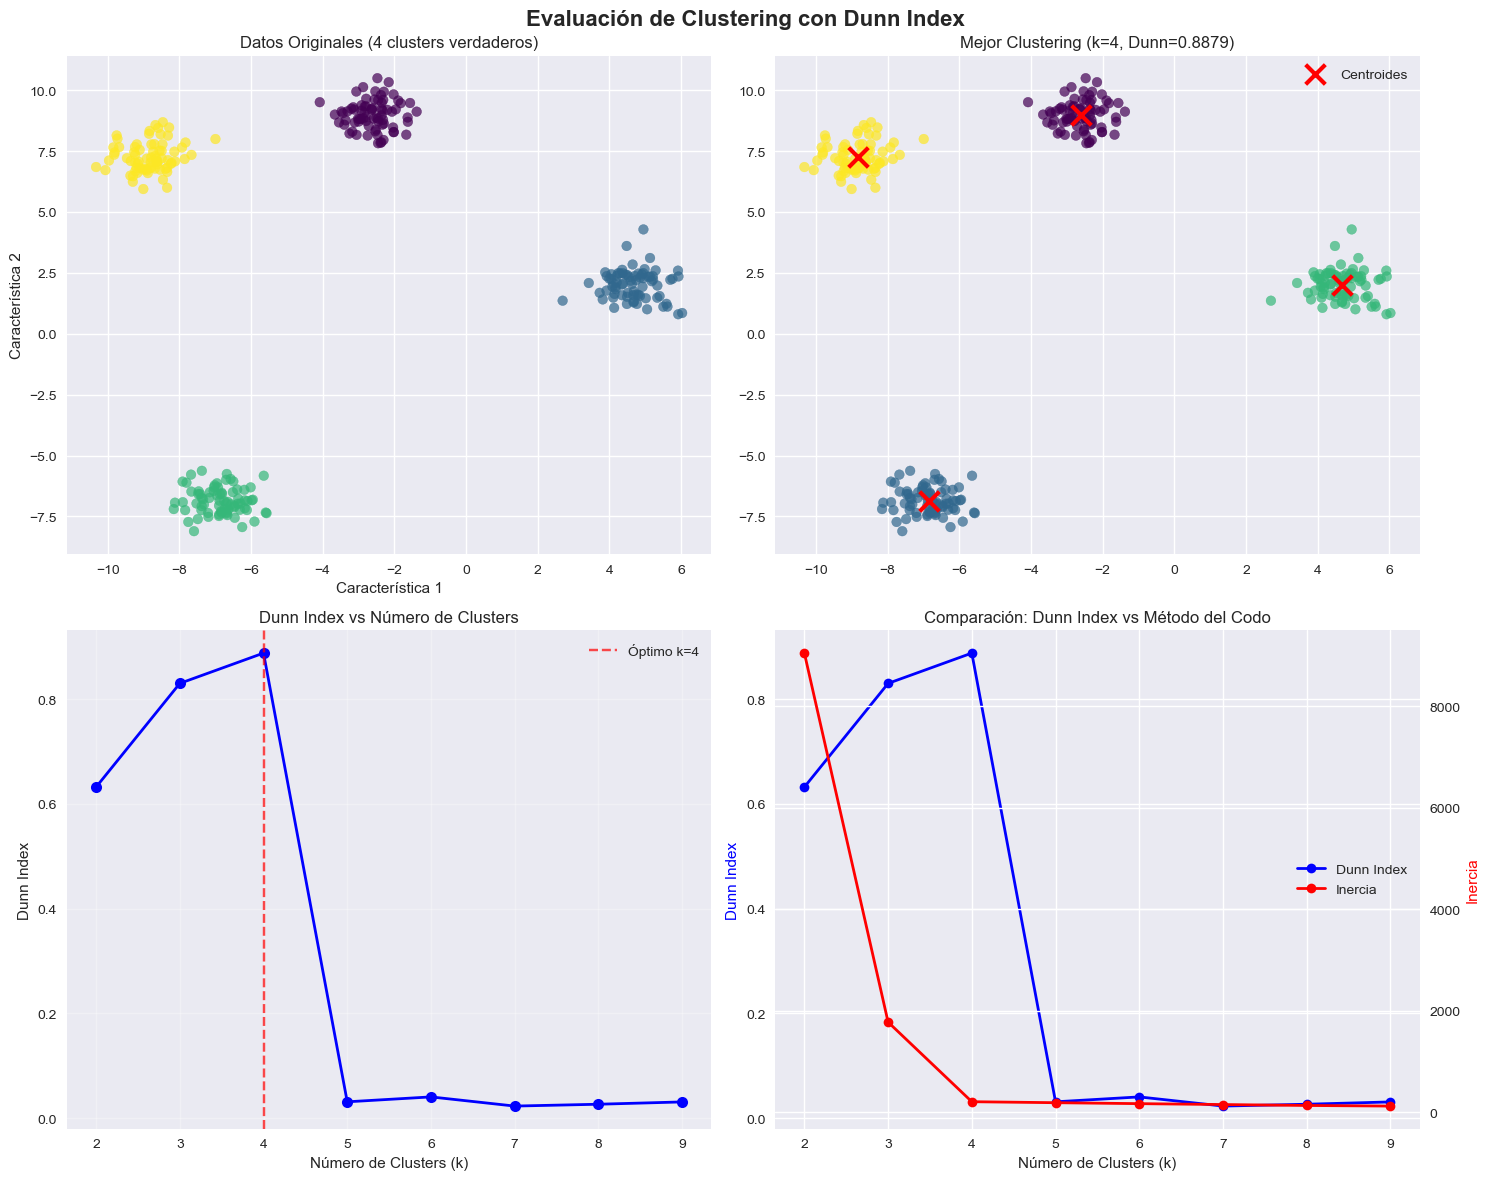

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Evaluación de Clustering con Dunn Index', fontsize=16, fontweight='bold')

# --- 1. Datos originales ---
axes[0, 0].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('Datos Originales (4 clusters verdaderos)', fontsize=12)
axes[0, 0].set_xlabel('Característica 1')
axes[0, 0].set_ylabel('Característica 2')

# --- 2. Mejor clustering según Dunn Index ---
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_labels = best_kmeans.fit_predict(X)
axes[0, 1].scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', alpha=0.7)
axes[0, 1].scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1],
                   c='red', marker='x', s=200, linewidths=3, label='Centroides')
axes[0, 1].set_title(f'Mejor Clustering (k={best_k}, Dunn={max(dunn_scores):.4f})', fontsize=12)
axes[0, 1].legend()

# --- 3. Evolución del Dunn Index ---
axes[1, 0].plot(k_values, dunn_scores, 'bo-', linewidth=2, markersize=8)
axes[1, 0].axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Óptimo k={best_k}')
axes[1, 0].set_title('Dunn Index vs Número de Clusters', fontsize=12)
axes[1, 0].set_xlabel('Número de Clusters (k)')
axes[1, 0].set_ylabel('Dunn Index')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# --- 4. Comparación: Dunn Index vs Inercia ---
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
line1 = ax4.plot(k_values, dunn_scores, 'bo-', label='Dunn Index', linewidth=2)
line2 = ax4_twin.plot(k_values, inertia_scores, 'ro-', label='Inercia', linewidth=2)
ax4.set_title('Comparación: Dunn Index vs Método del Codo', fontsize=12)
ax4.set_xlabel('Número de Clusters (k)')
ax4.set_ylabel('Dunn Index', color='blue')
ax4_twin.set_ylabel('Inercia', color='red')

# Leyenda combinada
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax4.legend(lines, labels, loc='center right')

plt.tight_layout()
plt.show()


In [32]:
print(f"\n--- ANÁLISIS DETALLADO DEL MEJOR CLUSTERING (k={best_k}) ---")
print(f"Dunn Index: {max(dunn_scores):.4f}\n")

unique_labels = np.unique(best_labels)
for i, label in enumerate(unique_labels):
    cluster_points = X[best_labels == label]
    cluster_size = len(cluster_points)
    
    if cluster_size > 1:
        diameter = pdist(cluster_points).max()
        avg_intra_dist = pdist(cluster_points).mean()
        print(f"Cluster {label}: {cluster_size:3d} puntos | "
              f"Diámetro: {diameter:7.3f} | "
              f"Distancia intra-cluster promedio: {avg_intra_dist:7.3f}")



--- ANÁLISIS DETALLADO DEL MEJOR CLUSTERING (k=4) ---
Dunn Index: 0.8879

Cluster 0:  75 puntos | Diámetro:   2.758 | Distancia intra-cluster promedio:   1.005
Cluster 1:  75 puntos | Diámetro:   2.995 | Distancia intra-cluster promedio:   1.024
Cluster 2:  75 puntos | Diámetro:   3.694 | Distancia intra-cluster promedio:   1.075
Cluster 3:  75 puntos | Diámetro:   3.523 | Distancia intra-cluster promedio:   1.051
